### Introduction
This notebook aims to apply KMeans algorithm on 2 sample images and evaluate its performance on image segmentation of the sample images. The results below can be used as a comparison with the performance of EM algorithm on image segmentation.

#### Remarks
1. May need to rewrite the code below in R to fulfill the course requirement but this work can serve as a raw prototype
2. Could try to fine-tune the parameters of KMeans for further improvement

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
import imageio
import numpy as np
from sklearn import cluster

In [2]:
FILENAME1 = './img/Co6q3lrygK-AbzQ0AAKvDylHHq4008.jpg'
FILENAME2 = './img/Co6q6Fry23KAGdrRAAJBxxyYEHQ922.jpg'

### Read Image

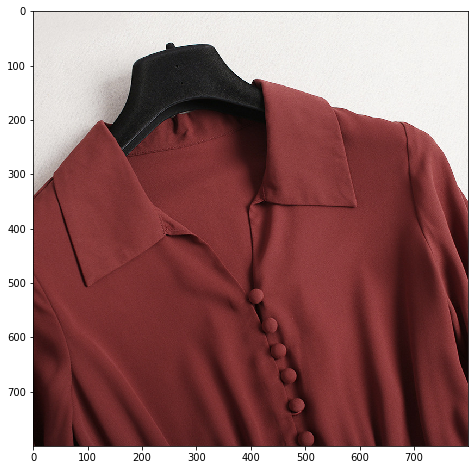

In [3]:
image1 = imageio.imread(FILENAME1)
plt.figure(figsize = (15,8))
plt.imshow(image1);

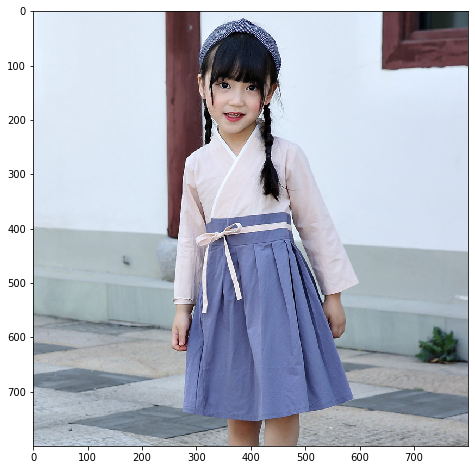

In [5]:
image2 = imageio.imread(FILENAME2)
plt.figure(figsize = (15,8))
plt.imshow(image2);

### Reshape Image from 3D to 2D

In [7]:
x1, y1, z1 = image1.shape
image_2d_1 = image1.reshape(x1 * y1, z1)
image_2d_1.shape;
# (800, 800, 3)
x2, y2, z2 = image2.shape
image_2d_2 = image2.reshape(x2 * y2, z2)
# (640000, 3)
image_2d_2.shape;

### Run KMeans for Varying K

In [14]:
def kmeans_img_cluster(image_2d, cluster_num):
    kmeans_cluster = cluster.KMeans(n_clusters = cluster_num)
    kmeans_cluster.fit(image_2d)
    cluster_centers = kmeans_cluster.cluster_centers_
    cluster_labels = kmeans_cluster.labels_
    print("There are {} classes with the following center".format(len(set(cluster_labels))))
    for mus in cluster_centers:
        print('\n {}'.format(mus))
    return cluster_centers, cluster_labels

In [12]:
centers_list = []
labels_list = []
#cluster_labels
for k_num in [2, 3, 5, 10]:
    centers, labels = kmeans_img_cluster(image_2d_1, k_num)
    centers_list.append(centers)
    labels_list.append(labels)

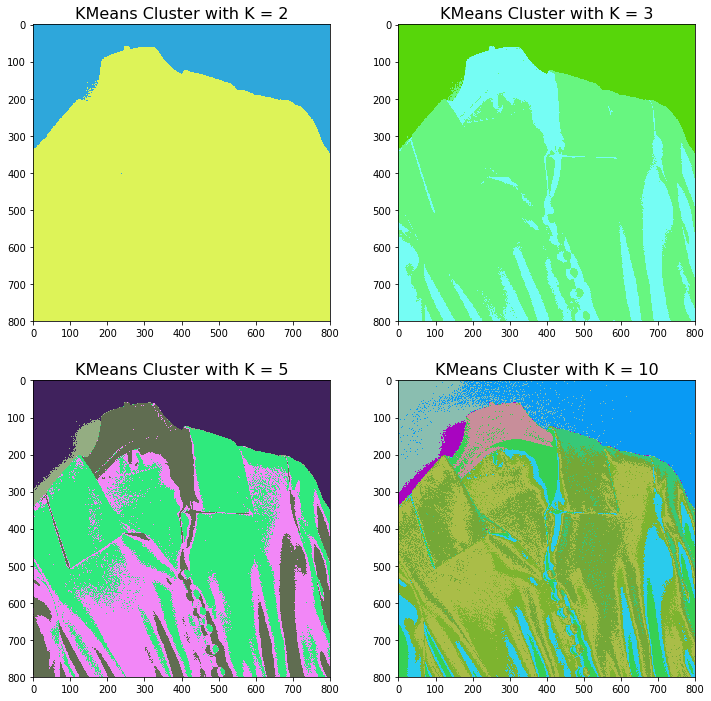

In [78]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12, 12))
ax_list = [ax1, ax2, ax3, ax4]
for c, l, ax in zip(centers_list, labels_list, ax_list):
    k = len(set(l))
    ax.imshow(c[l].reshape(x1, y1, z1));
    ax.set_title('KMeans Cluster with K = {}'.format(k), fontdict = {'fontsize': 16})

* When k=2, KMeans can clearly segment the clothe from the background
* When k is higher, KMeans identify noises as additiona clusters and make the segmentation effect worst
* Choosing an appropriate value of k is crucial for KMeans

There are 2 classes with the following center

 [ 99.44979023  99.15214136 121.67343971]

 [200.30147055 209.15178352 219.55052887]
There are 3 classes with the following center

 [217.68346669 227.18302823 240.44338679]

 [75.95880233 64.61300823 78.32663263]

 [148.47588353 156.68571344 172.35263267]
There are 5 classes with the following center

 [218.74155405 228.62086453 242.10864074]

 [109.57056291 119.19629967 153.27083609]

 [169.89247872 176.68038366 182.28416493]

 [28.18394478 28.         33.93945204]

 [92.30130089 66.6681806  73.8088329 ]
There are 10 classes with the following center

 [173.38376816 181.96782289 187.4059233 ]

 [ 84.66543926  94.2831074  137.87829119]

 [219.60196518 230.43330138 244.10306842]

 [110.72283233  76.49404953  77.61296696]

 [109.28470722 122.38639378 172.68375971]

 [22.79036107 24.28117867 30.1882652 ]

 [155.72228657 160.19616148 165.3618961 ]

 [119.98413717 125.24666292 133.6006206 ]

 [204.23179097 203.29985657 213.48285109]

 [75.0645

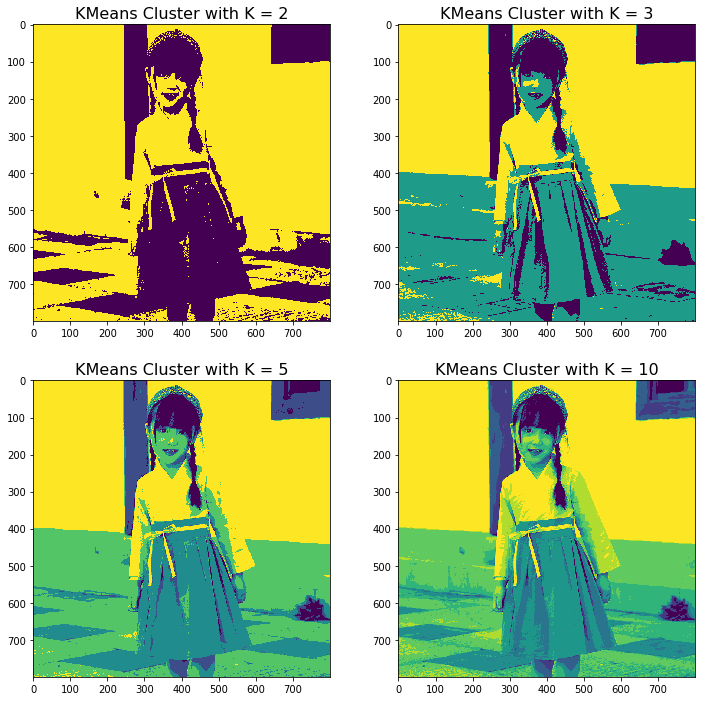

In [22]:
centers_list = []
labels_list = []
#cluster_labels
for k_num in [2, 3, 5, 10]:
    centers, labels = kmeans_img_cluster(image_2d_2, k_num)
    centers_list.append(centers)
    labels_list.append(labels)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12, 12))
ax_list = [ax1, ax2, ax3, ax4]
for c, l, ax in zip(centers_list, labels_list, ax_list):
    k = len(set(l))
    ax.imshow(np.sum(c[l].reshape(x2, y2, z2),axis=2));
    ax.set_title('KMeans Cluster with K = {}'.format(k), fontdict = {'fontsize': 16})

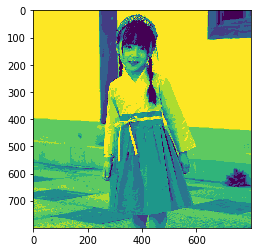

In [21]:
plt.figure();plt.imshow(np.sum(c[l].reshape((800,800,3)),axis=2))

* The segmentation performance is bad for different values of k
* This sample is harder to segment than the preceeding one
* The reason is possibly due to the variety of color throughout image

### Reference
https://dzone.com/articles/cluster-image-with-k-means